https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

# Groceries Store 
Initially, the essential libraries are imported 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
sns.set();

import warnings
warnings.filterwarnings('ignore') # Warnings are ignored with it. It is more visual. 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install networkx==2.3

The dataset was sourced by Kaggle and is in CSV format. To read it, pandas library is used. 

In [3]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


The shape of the dataset is crucial for initial analysis. It must be considered during data preparation—such as when dealing with null values—to determine if their count is significant. Additionally, the shape is important when applying models, as some models can be time-consuming. If the dataset is too large, it may be worthwhile to seek alternative methods.

In [4]:
df.shape

(38765, 3)

The "Describe" function provides statistical details from the dataset. It is notable that the most frequent date is 21/01/2015 and the most frequent item is "whole milk"

In [5]:
df.describe(include='all')

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


This dataset doesn’t contain any null values. The "date" feature is in object format, when the ideal is in date format, it will be handled later.  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df["Date"].unique()

array(['21-07-2015', '05-01-2015', '19-09-2015', '12-12-2015',
       '01-02-2015', '14-02-2015', '08-05-2015', '23-12-2015',
       '20-03-2015', '12-02-2015', '24-02-2015', '14-04-2015',
       '03-09-2015', '30-03-2015', '03-05-2015', '02-09-2015',
       '03-08-2015', '07-07-2015', '08-09-2015', '12-11-2015',
       '18-09-2015', '30-11-2015', '17-07-2015', '12-06-2015',
       '13-02-2015', '14-01-2015', '08-03-2015', '27-01-2015',
       '22-10-2015', '26-10-2015', '08-10-2015', '03-10-2015',
       '11-04-2015', '21-02-2015', '29-09-2015', '09-01-2015',
       '03-04-2015', '20-04-2015', '04-08-2015', '19-07-2015',
       '06-10-2015', '16-10-2015', '06-06-2015', '26-09-2015',
       '15-08-2015', '21-05-2015', '25-08-2015', '11-03-2015',
       '05-06-2015', '28-07-2015', '05-09-2015', '19-06-2015',
       '11-10-2015', '16-06-2015', '20-01-2015', '15-02-2015',
       '13-04-2015', '07-02-2015', '02-03-2015', '14-03-2015',
       '22-12-2015', '01-07-2015', '03-11-2015', '12-04

## Data Preparation

The date feature is converted to date format and some columns are added to facilitate exploratory data analysis (EDA) and integration into a model.




In [8]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


Adding Day, Month, and Year as separate features is a good approach for exploratory data analysis (EDA). It saves time by avoiding the need to apply formulas directly on the plot.

In [9]:
# Create new columns for day, month, and year
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df.head()

,Member_number,Date,itemDescription,Day,Month,Year
0,1808,2015-07-21,tropical fruit,21,7,2015
1,2552,2015-01-05,whole milk,5,1,2015
2,2300,2015-09-19,pip fruit,19,9,2015
3,1187,2015-12-12,other vegetables,12,12,2015
4,3037,2015-02-01,whole milk,1,2,2015


Now the date appears as date time:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   Day              38765 non-null  int32         
 4   Month            38765 non-null  int32         
 5   Year             38765 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 1.3+ MB


The column "weekend" is added because, in the field of groceries, it may be relevant. Certain items are often purchased more on weekends, and knowing this can help increase sales by targeting promotions at the right time.

In [11]:
# Add a column for weekend
df["Weekend"] = df["Date"].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)
df.head()

,Member_number,Date,itemDescription,Day,Month,Year,Weekend
0,1808,2015-07-21,tropical fruit,21,7,2015,0
1,2552,2015-01-05,whole milk,5,1,2015,0
2,2300,2015-09-19,pip fruit,19,9,2015,1
3,1187,2015-12-12,other vegetables,12,12,2015,1
4,3037,2015-02-01,whole milk,1,2,2015,1


Day time is added in order do enhance EDA.

In [12]:
df['Day_name']=df['Date'].dt.day_name()

Analysing the items into the 'itemDescription' feature:

In [13]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

Creating new column called 'Quantity':

* full_like from numpy library will assign value 1 in column 'Quantity' for each item in column 'itemDescription' (NumPy, 2023),
* value 1 will be INTEGER to enable to use mathematical functions in further process.

In [14]:
df['Quantity'] = np.full_like(df['itemDescription'], 1).astype(int)

Creating a new column called 'Invoice' which will uniquely identify each transaction:

Invoice's values combine values from columns Member_number and Date (SparkBy{Examples}, 2023)

In [15]:
df['Invoice'] = df["Member_number"].astype(str) + '-' +df["Date"].astype(str)

Let's take a look at how the pre-processed dataset appears:

In [16]:
df.head()

,Member_number,Date,itemDescription,Day,Month,Year,Weekend,Day_name,Quantity,Invoice
0,1808,2015-07-21,tropical fruit,21,7,2015,0,Tuesday,1,1808-2015-07-21
1,2552,2015-01-05,whole milk,5,1,2015,0,Monday,1,2552-2015-01-05
2,2300,2015-09-19,pip fruit,19,9,2015,1,Saturday,1,2300-2015-09-19
3,1187,2015-12-12,other vegetables,12,12,2015,1,Saturday,1,1187-2015-12-12
4,3037,2015-02-01,whole milk,1,2,2015,1,Sunday,1,3037-2015-02-01


## EDA

Exploratory data analysis (EDA) is crucial before employing any model, as it helps gaining a better understanding of the data. For this, I used libraries such as Matplotlib, Seaborn, and Plotly Express because I'm used to using them and they provide insightful tools.

I divided the EDA into sections: Customer analysis, trends over the period the purchases were made, and the top items most and least purchased.

In [121]:
plt.style.use("fivethirtyeight")

### Top 10 customers

The top 10 customers purchased between 28 and 35 items over the two years.
With 38,765 transactions and 3,898 unique customers, it's apparent that some customers only made a few purchases, as evidenced by the fact that the top 10 customers, on average, purchased 30 items each.

In [61]:
num_members = len(df.Member_number.unique())
quantity_items = len(df.itemDescription	.unique())
print('There are {} unique customers and {} unique items in this dataset'.format(num_members,quantity_items))

There are 3898 unique customers and 167 unique items in this dataset


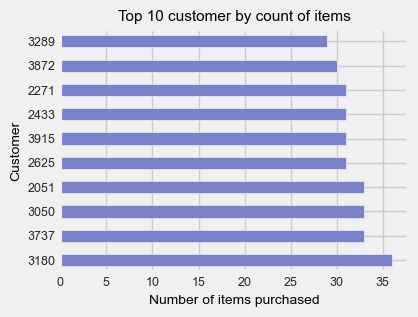

In [68]:
plt.figure(figsize=(4, 3))
df.Member_number.value_counts().head(10).plot(kind='barh', color='#7881C9')

plt.title('Top 10 customer by count of items', fontsize=11, color='black')
plt.xlabel('Number of items purchased', fontsize=10, color='black')
plt.ylabel('Customer', fontsize=10, color='black')
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()

For the visualizations, I opted for a light grey background with black-coloured fonts, and I highlighted the titles with a larger font size. Each bar is coloured differently to distinguish them from one another. The colours were chosen with an Interactive colour picker with Dash on the Pyplot website (plotly.com, n.d.).

The choice of chart types was influenced by previous experience gained in previous CAs and class. Bar charts are preferred for illustrating feature distributions, while line charts are suitable for displaying data over time due to their clarity. Scatter plots are employed to compare distributions between axes effectively. 

For the Top 10 customer graph, I opted for horizontal bars with Matplotlib due to its simplicity and timeless aesthetic, which resonates well with the customer-focused data. The blue colour of the bars enhances the classic visual style.

For the graphs displayed by Plotly Express, I maintained a consistent layout with a light grey paper background, white plot background, light black font colour and centralized texts. I selected the "plotly_white" template inspired by (PYTHON CHARTS | The definitive Python data visualization site, 2022). This choice ensures a professional and informative visual presentation, akin to financial reporting standards.

To avoid defining it in every plot, I applied a function with the layout template, and whenever I plot a graph with Pyplot, I use it. The formula is displayed below:

In [18]:
import plotly.io as pio
pio.templates.default = "plotly_white"

In [54]:
def apply_custom_style(fig, title):
    fig.update_layout(
        title=title,
        plot_bgcolor='white',  # Plot background color
        paper_bgcolor="#D9D9E2",  # Paper background color
        font=dict(color='rgb(50, 50, 50)'),  # Font color
        xaxis=dict(
            showgrid=False,  # Remove x-axis grid
            zeroline=False,
            title_font=dict(size=12),
            tickfont=dict(size=12)
        ),
        yaxis=dict(
            showgrid=True,  # Keep y-axis grid
            gridcolor='#E3E8F7',
            title_font=dict(size=12),
            tickfont=dict(size=12)
        ),
        title_x=0.5, # Centralized title
        title_font=dict(size=14)
    )

The plot below displays the average sales per customer monthly, indicating that they likely make 2 to 3 monthly purchases at this grocery store.

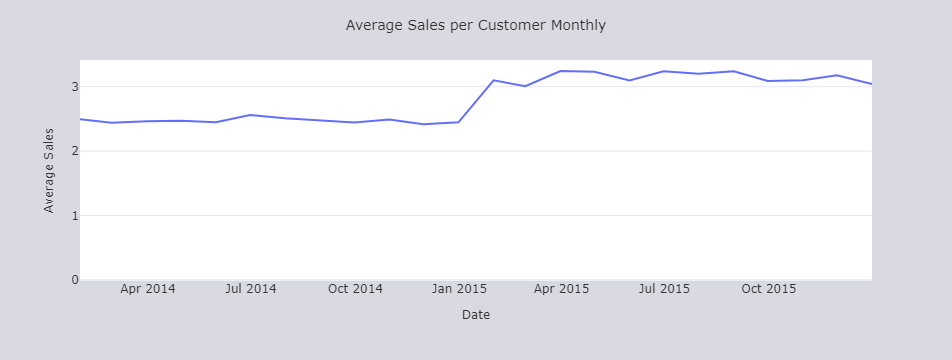

In [66]:
monthly_sales = df.resample('M', on='Date').size()
unique_monthly_customers = df.resample('M', on = 'Date').Member_number.nunique()
sales_per_customer = monthly_sales / unique_monthly_customers
fig = px.line(
    sales_per_customer,
    x = sales_per_customer.index,
    y = sales_per_customer,
    labels = {'y': 'Average Sales'}
)
apply_custom_style(fig, 'Average Sales per Customer Monthly')
fig.update_yaxes(rangemode="tozero")
fig.show()

Sales per Customer Monthly graph: For this visualization, I decided to keep a blue line to maintain a neutral tone against the white background. I think this creates a harmonious look. I kept the horizontal grid lines because, for a line graph, they make it easier to see small variations.

### When the purchases were made?

#### Monthly Purchases per Year

Creating a new dataset grouped by year and month allows for analysis of monthly purchases by each year. This suggests some trends in transaction peaks. In February, there tends to be a decrease, while from March onward, there is an increase. In 2015, the peak of sales was in August, whereas in 2014, it was in October. This underscores the importance of constantly analysing trends, as they may change, necessitating adjustments in approaches to increase sales.

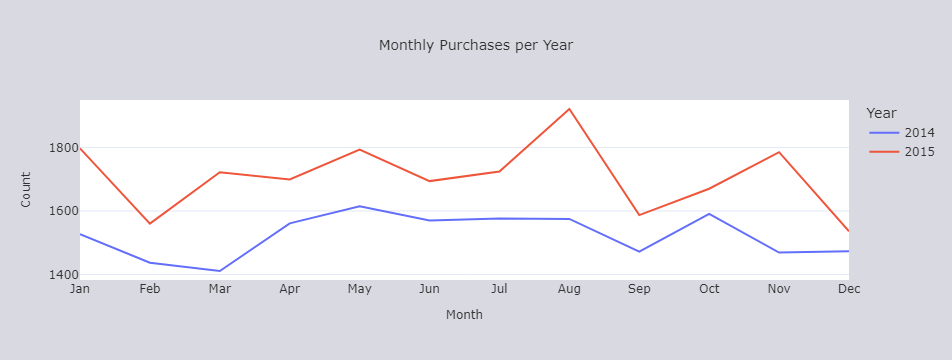

In [56]:
df_month_year = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
df_month_year = df_month_year.T
fig = px.line(df_month_year, x=df_month_year.index, y=df_month_year.columns,
              title='Monthly Purchases per Year', labels={'index': 'Month', 'value': 'Count'}, template='plotly_white')

fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
apply_custom_style(fig, 'Monthly Purchases per Year')
fig.show()

I chose to keep a similar layout to the previous graph. I kept the line colors as default in red and blue because it creates a good contrast that makes it easier to distinguish between them. We can clearly see the difference between the two years. The font is kept the same as the title, with the title centered.

The created dataset can be displayed in table format. It allows us to compare and analyse the amounts:

In [70]:
df_month_year

Year,2014,2015
Month,,
1,1527,1797
2,1437,1560
3,1411,1722
4,1561,1699
5,1615,1793
6,1570,1694
7,1576,1724
8,1575,1921
9,1472,1587


Grouping the data by Date and counting the transactions per day. There is no pattern among the days, but, notably, on some days there are more items purchased than others. 

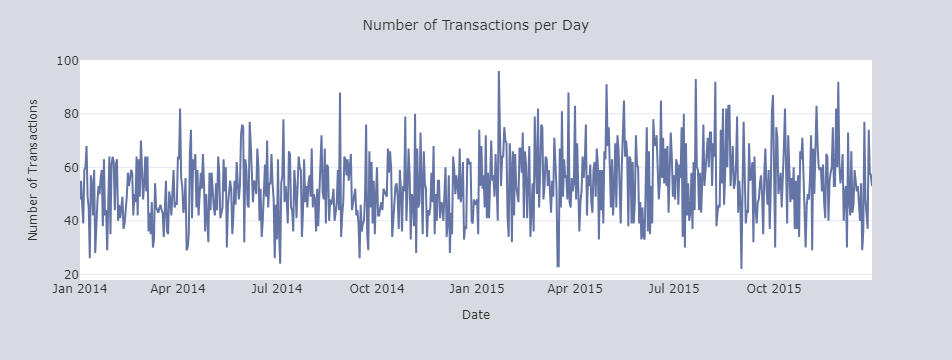

In [57]:
# Grouping the data by Date and counting the transactions per day
transactions_per_day = df.groupby("Date").size().reset_index(name='Number of Transactions')

# Plotting the line plot using Plotly Express
fig = px.line(
    transactions_per_day,
    x='Date',
    y='Number of Transactions',
    labels={'Number of Transactions': 'Number of Transactions'},
    template='plotly_white'
)
# Apply the custom style to the figure
apply_custom_style(fig, 'Number of Transactions per Day')
fig.update_traces(line=dict(color='#6474A4'))
fig.show()

Given that it's often notable that some offers are promoted on specific days of the week, the graphs below display the transaction counts by year and day of the week. Comparing 2014 with 2015, it seems that customer behaviour may have changed, for instance, while in 2014 most of the purchase items were made on Thursdays, in 2015 it was on Wednesdays.

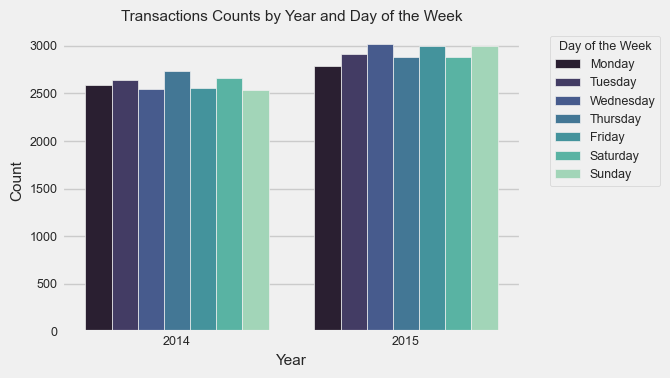

In [26]:
order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(7, 4))
sns.countplot(df, x='Year', hue='Day_name', legend=True, hue_order=order_week, palette="mako")

plt.title('Transactions Counts by Year and Day of the Week', fontsize=11)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)

legend = plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.setp(legend.get_title(), fontsize='9')
plt.tick_params(axis='both', which='major', labelsize=9)

plt.tight_layout()
plt.show()

'Transaction Counts by Year and Day of the Week' chart: The days are ordered according to the week for easy visualisation. The chosen colour was based on research on the Seaborn website and was selected to align with the standards of the others, maintaining consistency across all visualisations. The legend position is on the top right giving a professional layout and all the font sizes are aligned emphasising the title and labels. 

A similar visualization is presented below, but with data from the two years combined for comparison.

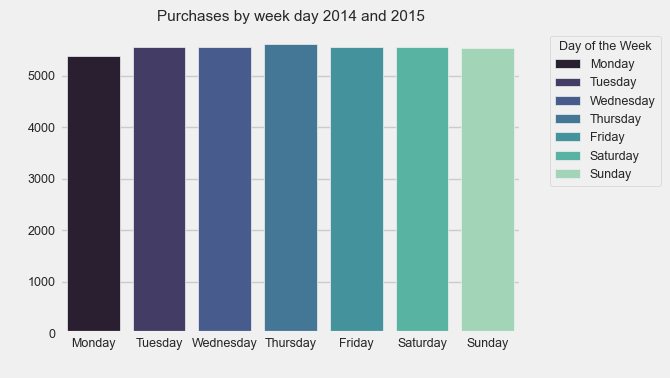

In [100]:
order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(7, 4))
sns.countplot(df, x='Day_name', hue='Day_name', hue_order=order_week, legend=True, palette="mako", order=order_week)

plt.title('Purchases by week day 2014 and 2015', fontsize=11)
plt.xlabel(' ', fontsize=10)
plt.ylabel(' ', fontsize=10)

legend = plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.setp(legend.get_title(), fontsize='9')
plt.tick_params(axis='both', which='major', labelsize=9)

plt.tight_layout()
plt.show()

#### Days Between Purchases

To determine how often each customer visits this particular grocery store, the number of days between purchases is calculated, adding a new feature to the dataset:

In [29]:
df_between_purchases = df.sort_values(by=['Member_number', 'Date'])
df_between_purchases['days_between_purchases'] = df_between_purchases.groupby('Member_number')['Date'].diff().dt.days
df_between_purchases['days_between_purchases'] = df_between_purchases['days_between_purchases'].fillna(0)
df_between_purchases.head()

,Member_number,Date,itemDescription,Day,Month,Year,Weekend,Day_name,Quantity,Invoice,days_between_purchases
13331,1000,2014-06-24,whole milk,24,6,2014,0,Tuesday,1,1000-2014-06-24,0.0
29480,1000,2014-06-24,pastry,24,6,2014,0,Tuesday,1,1000-2014-06-24,0.0
32851,1000,2014-06-24,salty snack,24,6,2014,0,Tuesday,1,1000-2014-06-24,0.0
4843,1000,2015-03-15,sausage,15,3,2015,1,Sunday,1,1000-2015-03-15,264.0
8395,1000,2015-03-15,whole milk,15,3,2015,1,Sunday,1,1000-2015-03-15,0.0


Since some customers only made one purchase, I will only consider those who return at least once for this analysis.

In [30]:
df_between_purchases = df_between_purchases[df_between_purchases['days_between_purchases'] > 0]
df_between_purchases['days_between_purchases'] = df_between_purchases['days_between_purchases'].astype(int)
df_between_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11065 entries, 4843 to 3578
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Member_number           11065 non-null  int64         
 1   Date                    11065 non-null  datetime64[ns]
 2   itemDescription         11065 non-null  object        
 3   Day                     11065 non-null  int32         
 4   Month                   11065 non-null  int32         
 5   Year                    11065 non-null  int32         
 6   Weekend                 11065 non-null  int64         
 7   Day_name                11065 non-null  object        
 8   Quantity                11065 non-null  int32         
 9   Invoice                 11065 non-null  object        
 10  days_between_purchases  11065 non-null  int32         
dtypes: datetime64[ns](1), int32(5), int64(2), object(3)
memory usage: 821.2+ KB


Analysing the Distribution of Days Between Purchases is an important detail because we can see how often the customer usually buys in that particular Grocery Store. The chart below shows that a customer is more likely to return in a few days:

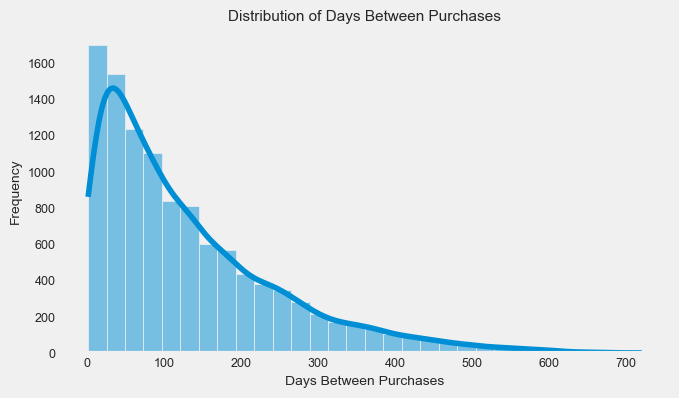

In [58]:
plt.figure(figsize=(7, 4))
sns.histplot(df_between_purchases['days_between_purchases'], bins=30, kde=True, palette="mako")

plt.title('Distribution of Days Between Purchases', fontsize=11)
plt.xlabel('Days Between Purchases', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(False)

plt.show()

#### Correlation between sales in 2014 and 2015

Calculating the correlation between sales in 2014 and 2015

In [90]:
df_month_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2014    12 non-null     int64
 1   2015    12 non-null     int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [74]:
correlation_years = df_month_year[2014].corr(df_month_year[2015])
print(f'Correlation between sales in 2014 and 2015: {correlation_years}')

Correlation between sales in 2014 and 2015: 0.4654402963659504


Employing the correlation function, it achieves a Correlation between sales in 2014 and 2015 of 0.4654. It suggests there is a partial correlation between both of the years. The scatterplot below shows the count of transactions per month between the years. At some months the count is similar, but considering that 2015 has a higher number of transactions, it is normal to have some differences. 

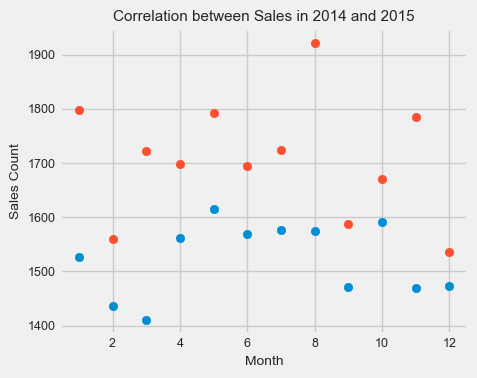

In [97]:
months = df_month_year.index.astype(int) 
counts_2014 = df_month_year[2014].values
counts_2015 = df_month_year[2015].values
# Plot
plt.figure(figsize=(5, 4))
plt.scatter(months, counts_2014, label='2014')
plt.scatter(months, counts_2015, label='2015')
plt.title('Correlation between Sales in 2014 and 2015', fontsize=11)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Sales Count', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

### Top purchased items

Analyzing the top 10 purchased items in a grocery store is crucial for understanding customer preferences, generating revenue, managing inventory effectively, planning marketing strategies, and staying competitive in the market. By focusing on these top-selling items, grocery stores can optimize operations and enhance the overall shopping experience for customers.

To display the chart using Seaborn, a new dataframe is created where contains only the top 10 most purchased items

In [40]:
top_10_items = df['itemDescription'].value_counts().head(10)
top_10_items_df = top_10_items.reset_index()
top_10_items_df.columns = ['itemDescription', 'Quantity']
top_10_items_df.head()

,itemDescription,Quantity
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334


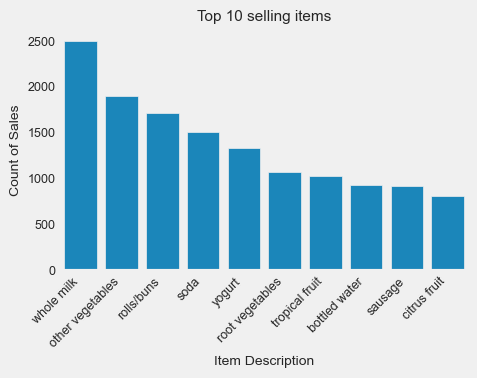

In [42]:
plt.figure(figsize=(5, 4))

sns.barplot(x='itemDescription', y='Quantity', data = top_10_items_df, estimator="sum", errorbar=None)
plt.title('Top 10 selling items', fontsize=11)
plt.xlabel('Item Description', fontsize=10)
plt.ylabel('Count of Sales', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

A simpler way is to use Matplot, as was made with the top 10 customers earlier.

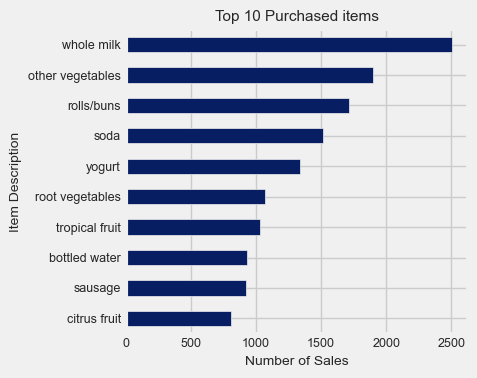

In [101]:
plt.figure(figsize = (5,4))
df.itemDescription.value_counts().head(10).sort_values().plot(kind='barh', color="#071E63")
plt.title('Top 10 Purchased items', fontsize=11)
plt.xlabel('Number of Sales', fontsize=10)
plt.ylabel('Item Description', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=9)
plt.tight_layout()
plt.show()

Out of the total transactions, which amounted to 38,765, approximately 6% of the purchased items were "whole milk."

A treemap is particularly useful for visualizing the frequency of items purchased because it clearly represents items in a visual format, with each item's box size proportional to its purchase frequency.

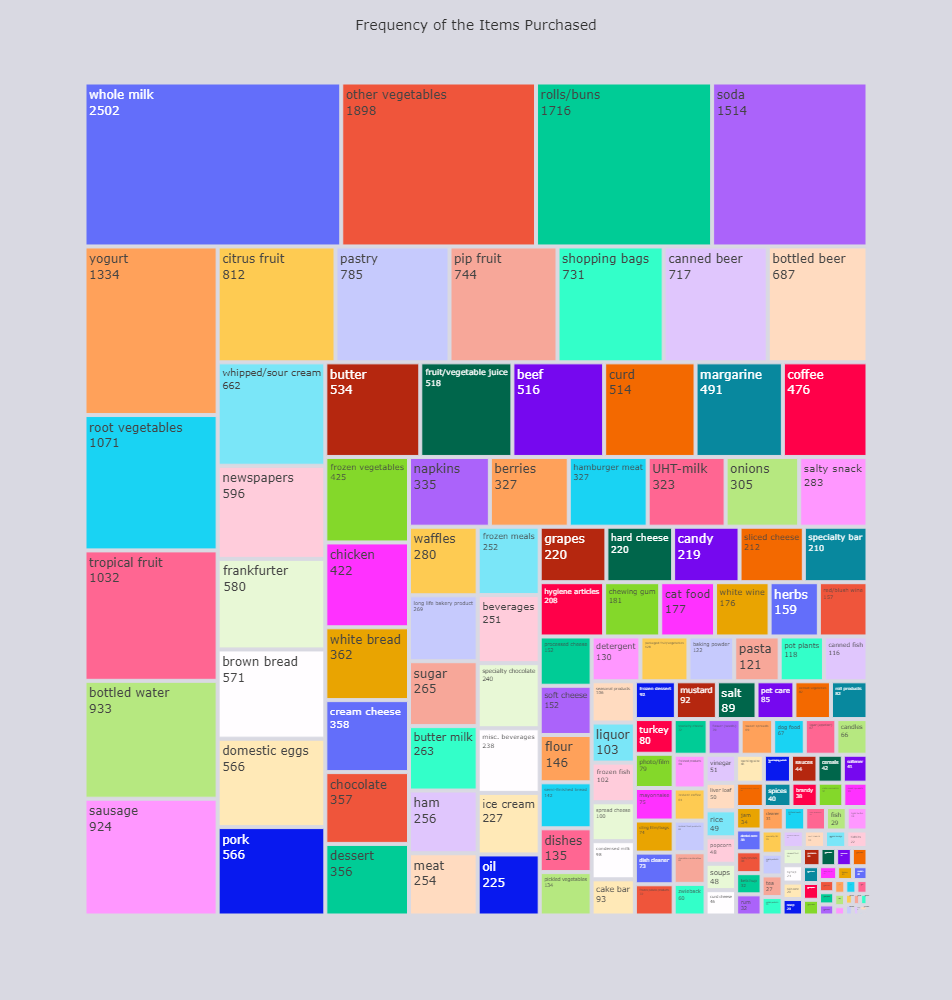

In [104]:
Frequency_of_items = df.groupby(pd.Grouper(key = 'itemDescription')).size().reset_index(name = 'count')
fig = px.treemap(Frequency_of_items, path = ['itemDescription'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Purchased Items',
    title_x = 0.1, title_font = dict(size = 13),
    height = 1000
)
fig.update_traces(textinfo = "label+value")
apply_custom_style(fig, 'Frequency of the Items Purchased')
fig.show()

Maintaining a colourful treemap in a grocery store can improve data comprehension, highlight important patterns, and make the visualisation more attractive and engaging for users.

The top 10 purchased items at weekends are displayed to analysing if there is some difference when comparing to the overall purchases.
It appears to be the same items, there is no difference when comparing to the overall purchases.

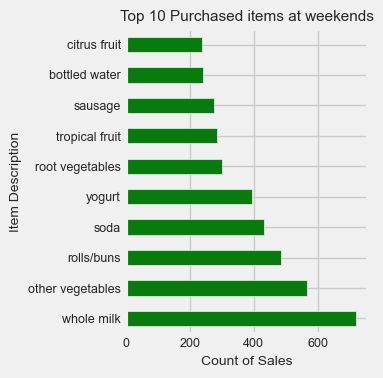

In [102]:
weekend_df = df[df['Weekend']== 1]
plt.figure(figsize = (4,4))
weekend_df.itemDescription.value_counts().head(10).plot(kind='barh', color="#077C0C")
plt.title('Top 10 Purchased items at weekends', fontsize=11)
plt.xlabel('Count of Sales', fontsize=10)
plt.ylabel('Item Description', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=9)
plt.tight_layout()
plt.show()

#### Top 10 least selling items

Analysing the top 10 least selling items is crucial because it enables the grocery store to work on strategies to improve sales.

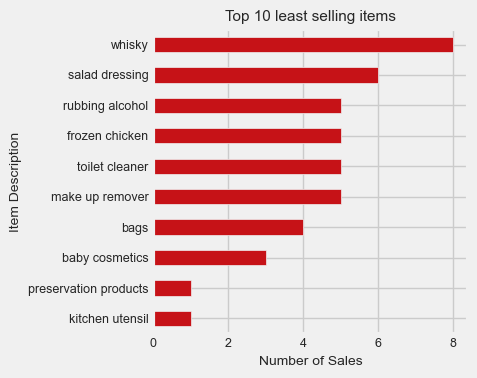

In [39]:
plt.figure(figsize = (5,4))
df.itemDescription.value_counts().tail(10).sort_values().plot(kind='barh', color="#C61217")
plt.title('Top 10 least selling items', fontsize=11)
plt.xlabel('Number of Sales', fontsize=10)
plt.ylabel('Item Description', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=9)
plt.tight_layout()
plt.show()

The bar colour is set to red because it signifies areas needing improvement in the grocery store.

In [50]:
df.columns

Index(['Member_number', 'Date', 'itemDescription', 'Day', 'Month', 'Year',
       'Weekend', 'Day_name', 'Quantity', 'Invoice'],
      dtype='object')

# Iterative Dashboard Groceries

In [42]:
#pip install flask pandas plotly dash

In [43]:
#df.to_csv('online_retail_data.csv', index=False, encoding='utf-8')

# Groceries Store

Market basket analysis (MBA) is one such top retail application of machine learning. It helps retailers know what products people are purchasing together so that the store/website layout can be designed in the same manner. It is mainly done by studying their previous purchasing activity. Companies also leverage it in cross-selling their products on their online platform. Amazon is a great example that leverages this analysis to cross-sell products. These are the products that come under the suggested item list which might interest you along with your current purchase (Chaudhary, n.d.).

Terminologies used in market basket analysis:

 * Itemset: It refers to the set of items that are purchased together by a customer at the same time. By default, we state it as a logical rule with IF and THEN. For instance, IF (Bread, Butter), THEN (Milk). It is also possible that an item set may consist of no items that are usually ignored by all items in the dataset.
 * Support count: It is the frequency of a particular item set appearing in the transaction database. It is also stated as a probability. For instance, if milk has a support count of 50 out of a possible 500 transactions, then the probability is 50/500 or 0.1.
 * Confidence: It refers to the conditional probability that represents what items have a possibility of being purchased together. It finds application in the product placement strategy intending to increase profitability. For instance, by placing the high-margin items close to the related high-confidence items, retailers can increase the overall sales and revenue on purchases.
 * Antecedent: The IF component written on the left-hand side or the item sets within the data are referred to as antecedents.
 * Consequent: The THEN component or an item or itemset found in combination with the antecedent is called the consequent.

There are several options to employ MBA, in this study, I will focus on two of them, Apriori and FP growth algorithms.

## MBA Apriori
The Apriori algorithm works in two steps that are:    
•	It identifies the itemsets systematically that occur frequently in the dataset and support greater than the pre-specified threshold value.    
•	Next, it calculates the confidence of all possible rules. However, it only keeps those items states that have confidence greater than a pre-specified threshold.


It is further classified into three components.
* Support: The Apriori algorithm works in two steps. It identifies the itemsets systematically that occur frequently in the dataset and support greater than the pre-specified threshold value. Next, it calculates the confidence of all possible rules. However, it only keeps those items states that have confidence greater than a pre-specified threshold.
* Lift: It is the ratio of the confidence percent to the support percent.
* Confidence: It is the ratio of combined transactions to individual transactions.

Implementing the Apriori Algorithm:

Initially the necessary libraries are imported

In [105]:
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import KFold
from mlxtend.frequent_patterns import apriori
import networkx as nx
import random
from tqdm.notebook import tqdm

In [106]:
df.head()

,Member_number,Date,itemDescription,Day,Month,Year,Weekend,Day_name,Quantity,Invoice
0,1808,2015-07-21,tropical fruit,21,7,2015,0,Tuesday,1,1808-2015-07-21
1,2552,2015-01-05,whole milk,5,1,2015,0,Monday,1,2552-2015-01-05
2,2300,2015-09-19,pip fruit,19,9,2015,1,Saturday,1,2300-2015-09-19
3,1187,2015-12-12,other vegetables,12,12,2015,1,Saturday,1,1187-2015-12-12
4,3037,2015-02-01,whole milk,1,2,2015,1,Sunday,1,3037-2015-02-01


The first step is to create a basket. The chosen approach depends on the dataset and its properties. I decided to use one of the most common that groups the “Member_number” and the “item_description” is moved into columns where the values are the counted items purchased by each customer.  

In [107]:
baskets = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets.head(2)

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0


Then it is encoded using One Hot Encoder where True is signed when “1” and False otherwise. 

In [108]:
# Using True & False instead of 1 & 0 because it has better performance 
def one_hot_encoder(count):
    return count <= 0

baskets = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets.head(1)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True


In [109]:
baskets.shape

(3898, 167)

In [110]:
def get_frequent_itemsets(train_set):
    frequent_itemsets = apriori(
        train_set,
        min_support = 0.9955,
        use_colnames = True,
        max_len = 3
        
    ).sort_values(by = 'support',ascending = False)
#     print('Frequent sets:', len(frequent_itemsets))
    return frequent_itemsets

Association rules for indicating antecedents and consequent items

In [111]:
def get_association_rules(frequent_itemsets):
    rules = association_rules(
        frequent_itemsets, metric = "lift", 
        min_threshold = 1
    ).sort_values('lift', ascending = False)
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    print('Association rules:', len(rules))
    return rules

Testing accuracy

In [112]:
def get_test_set_accuracy(test_set, rules_set):
    correct = 0
    total = 0

    for testI in range(len(test_set)):
        test_row = test_set.iloc[testI]
        
        for rulesI in range(len(rules_set)):  
            antecedents = rules_set.iloc[rulesI].antecedents
            consequents = rules_set.iloc[rulesI].consequents
            
            # if there is a test basket that contains both antecedents and consequents
            if (test_row[antecedents].values & test_row[consequents].values).any():
                correct += 1
                break
                
        total += 1

    return correct / total

Trainning & cross-validation
It displays the association rules for each split in cross-validation:

In [113]:

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cross_validation_accuracies=[]

full_rules_df = pd.DataFrame()
for train_index, test_index in tqdm(kf.split(baskets), total = 5):
    baskets_train, baskets_test = baskets.iloc[train_index], baskets.iloc[test_index]
    
    frequent_itemsets = get_frequent_itemsets(baskets_train)
    rules = get_association_rules(frequent_itemsets)
    
    full_rules_df = pd.concat([full_rules_df, rules], axis=0)
    
    cross_validation_accuracies.append(get_test_set_accuracy(baskets_test, rules))

  0%|          | 0/5 [00:00<?, ?it/s]

Association rules: 10
Association rules: 730
Association rules: 2
Association rules: 2
Association rules: 24


In order to evaluate the model, the dataset is divided into train and test. 
The “min_support” is settled with 0.99 and the metric is “lift” because it measures the ratio of the confidence to the support. 
Displaying the “frequent_itemsets” showcase the frequent items purchased together: 

In [114]:
frequent_itemsets

,support,itemsets
18,0.999679,(preservation products)
13,0.999679,(kitchen utensil)
122,0.999359,"(kitchen utensil, preservation products)"
0,0.999038,(baby cosmetics)
9,0.999038,(frozen chicken)
...,...,...
231,0.995511,"(baby cosmetics, toilet cleaner, whisky)"
232,0.995511,"(cream, kitchen utensil, bags)"
322,0.995511,"(toilet cleaner, frozen chicken, hair spray)"
321,0.995511,"(rubbing alcohol, frozen chicken, hair spray)"


Displaying the “rules” it shows that if a customer purchases frozen chicken they are likely to purchase specialty vegetables. The three components suggest strong metrics:

In [115]:
full_rules_df

,antecedents,consequents,support,confidence,lift
0,(frozen chicken),(specialty vegetables),0.995831,0.997110,1.000318
1,(specialty vegetables),(frozen chicken),0.995831,0.999035,1.000318
4,(frozen chicken),"(specialty vegetables, preservation products)",0.995510,0.996789,1.000318
8,(frozen chicken),"(specialty vegetables, kitchen utensil)",0.995510,0.996789,1.000318
3,"(specialty vegetables, preservation products)",(frozen chicken),0.995510,0.999034,1.000318
...,...,...,...,...,...
12,"(kitchen utensil, decalcifier)",(hair spray),0.995832,0.998072,1.000317
16,"(decalcifier, preservation products)",(hair spray),0.995832,0.998072,1.000317
15,(hair spray),"(kitchen utensil, decalcifier)",0.995832,0.998072,1.000317
20,"(baby cosmetics, frozen chicken)",(specialty vegetables),0.995511,0.997430,1.000317


Accuracy & Standard Deviation

Employing cross-validation we can test the accuracy of the rules on the test data:

In [116]:
# Testing the accuracy of the rules on the test data
cross_validation_avg_accuracy = np.mean(cross_validation_accuracies)
cross_validation_std = np.std(cross_validation_accuracies)

print('Average Accuracy:', cross_validation_avg_accuracy)
print('Standard Deviation:', cross_validation_std)

Average Accuracy: 0.997434251670452
Standard Deviation: 0.003142388185318276


With an Average Accuracy of 0.99 suggests the model is performing well. 

The top rules displays the rules with the highest lift score:

In [117]:
top_rules = rules.nlargest(10, 'lift')

fig = px.scatter(top_rules, x='support', y='confidence',
                 size='lift', color='lift',
                 hover_data=['antecedents', 'consequents'],
                 title='Top 10 Association Rules by Lift')

In [118]:
top_rules

,antecedents,consequents,support,confidence,lift
0,(frozen chicken),(specialty vegetables),0.996473,0.997433,1.000319
1,(specialty vegetables),(frozen chicken),0.996473,0.999357,1.000319
4,(frozen chicken),"(specialty vegetables, kitchen utensil)",0.996153,0.997112,1.000319
10,(frozen chicken),"(specialty vegetables, preservation products)",0.996153,0.997112,1.000319
9,"(specialty vegetables, preservation products)",(frozen chicken),0.996153,0.999357,1.000319
3,"(specialty vegetables, kitchen utensil)",(frozen chicken),0.996153,0.999357,1.000319
22,(frozen chicken),"(baby cosmetics, specialty vegetables)",0.995511,0.996470,1.000318
21,"(baby cosmetics, specialty vegetables)",(frozen chicken),0.995511,0.999356,1.000318
5,(specialty vegetables),"(frozen chicken, kitchen utensil)",0.996153,0.999035,1.000318
8,"(frozen chicken, preservation products)",(specialty vegetables),0.996153,0.997432,1.000318


Visualising association rules

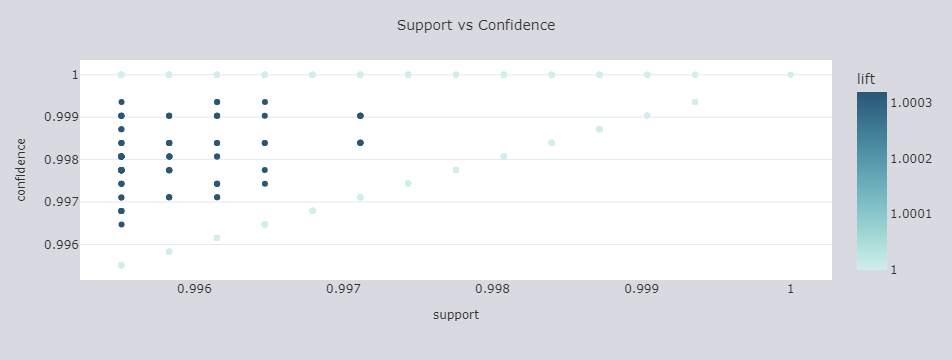

In [124]:
fig=px.scatter(full_rules_df, x='support', y='confidence', color='lift', color_continuous_scale="teal")
apply_custom_style(fig, 'Support vs Confidence')
fig.update_traces(line=dict(color='#6474A4'))
fig.show()

In [125]:
def visualize_rules(item, no_of_rules, baskets):
    # df of item passed
    item_df = baskets.loc[baskets[item] == 1]

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    print(rules['consequents'].head(6).tolist())

    support = rules.support.values
    confidence = rules.confidence.values

    for i in range(len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5)
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)

    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("plasma", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.seismic)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

Items frequently bought together with frozen chicken
[frozenset({'specialty vegetables'}), frozenset({'frozen chicken'}), frozenset({'specialty vegetables', 'kitchen utensil'}), frozenset({'specialty vegetables', 'preservation products'}), frozenset({'frozen chicken'}), frozenset({'frozen chicken'})]
Visualization of Rules


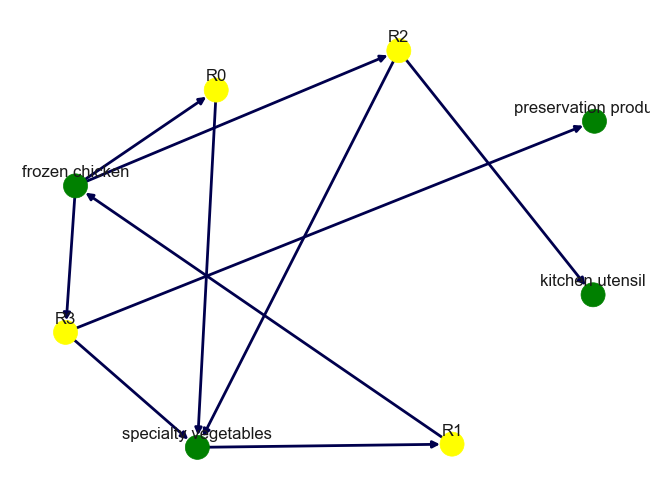

In [126]:
visualize_rules('frozen chicken',4,baskets)

Code by https://www.kaggle.com/code/prasad22/market-basket-analysis-with-apriori-algorithm

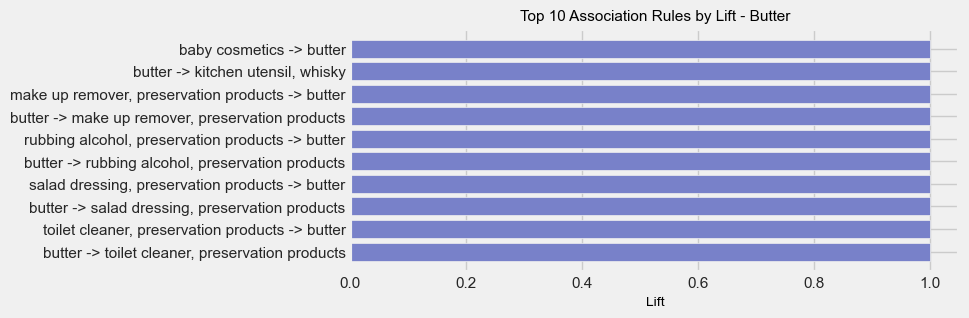

In [132]:
cat_df = baskets.loc[baskets['butter']==1]
frequent_itemsets = apriori(cat_df, min_support=0.998, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Convert frozensets to strings for labeling
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart
plt.figure(figsize=(7, 3))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'],color='#7881C9')

plt.title('Top 10 Association Rules by Lift - Butter', fontsize=11, color='black')
plt.xlabel('Lift', fontsize=10, color='black')
plt.gca().invert_yaxis()
plt.show()

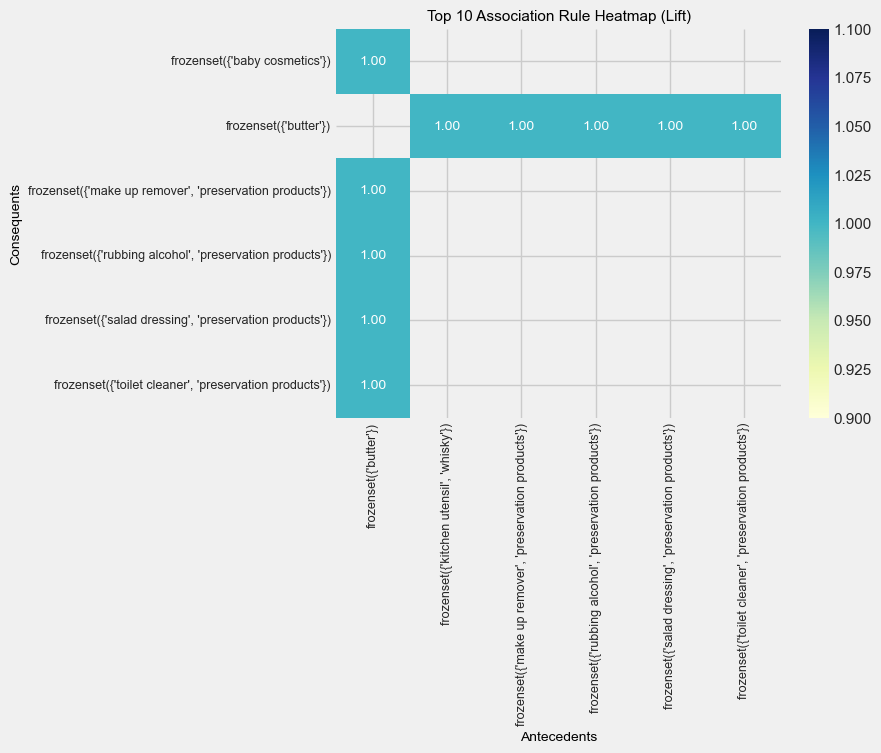

In [140]:
import seaborn as sns
heatmap_data = top_rules.pivot(index='antecedents', columns='consequents', values='lift')

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 10})

plt.title('Top 10 Association Rule Heatmap (Lift)', fontsize=11, color='black')
plt.xlabel('Antecedents', fontsize=10, color='black')
plt.ylabel('Consequents', fontsize=10, color='black')
plt.tick_params(axis='both', which='major', labelsize=9)
plt.show()

## FP-growth algorithm / Market Basket Analysis
The FP Growth algorithm is a popular method for frequent pattern mining in data mining. It works by constructing a frequent pattern tree (FP-tree) from the input dataset. The FP-tree is a compressed representation of the dataset that captures the frequency and association information of the items in the data (Jodha, 2023).
The FP Growth algorithm in data mining has several advantages over other frequent pattern mining algorithms, such as Apriori. The Apriori algorithm is not suitable for handling large datasets because it generates a large number of candidates and requires multiple scans of the database to my frequent items. In comparison, the FP Growth algorithm requires only a single scan of the data and a small amount of memory to construct the FP tree


In [141]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from tqdm.notebook import tqdm

In [167]:
basket_fpgrowth = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets.head(2)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True
1,True,True,True,True,True,True,True,True,False,True,...,True,True,True,False,True,False,True,False,True,True


In [168]:
# Using True & False instead of 1 & 0 because it has better performance 
def one_hot_encoder(count):
    return count <= 0

basket_fpgrowth = basket_fpgrowth.iloc[:, 1:basket_fpgrowth.shape[1]].applymap(one_hot_encoder)
basket_fpgrowth.head(1)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True


In [169]:
basket_fpgrowth.shape

(3898, 167)

In [170]:
def get_frequent_itemsets(train_set):
    frequent_itemsets = fpgrowth(
        train_set,
        min_support = 0.9955,
        use_colnames = True,
        max_len = 3
        
    ).sort_values(by = 'support',ascending = False)
#     print('Frequent sets:', len(frequent_itemsets))
    return frequent_itemsets

Association rules for indicating astecedent and consequent items

In [171]:
def get_association_rules(frequent_itemsets):
    rules = association_rules(
        frequent_itemsets, metric = "lift", 
        min_threshold = 1
    ).sort_values('lift', ascending = False)
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    print('Association rules:', len(rules))
    return rules

Testing accuracy

In [172]:
def get_test_set_accuracy(test_set, rules_set):
    correct = 0
    total = 0

    for testI in range(len(test_set)):
        test_row = test_set.iloc[testI]
        
        for rulesI in range(len(rules_set)):  
            antecedents = rules_set.iloc[rulesI].antecedents
            consequents = rules_set.iloc[rulesI].consequents
            
            # if there is a test basket that contains both antecedents and consequents
            if (test_row[antecedents].values & test_row[consequents].values).any():
                correct += 1
                break
                
        total += 1

    return correct / total

Trainning & cross-validation
As a results of the changed method, it finds more association rules:

In [173]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cross_validation_accuracies=[]

full_rules_df = pd.DataFrame()
for train_index, test_index in tqdm(kf.split(basket_fpgrowth), total = 5):
    baskets_train, baskets_test = basket_fpgrowth.iloc[train_index], basket_fpgrowth.iloc[test_index]
    
    frequent_itemsets = get_frequent_itemsets(baskets_train)
    rules = get_association_rules(frequent_itemsets)
    
    full_rules_df = pd.concat([full_rules_df, rules], axis=0)
    
    cross_validation_accuracies.append(get_test_set_accuracy(baskets_test, rules))

  0%|          | 0/5 [00:00<?, ?it/s]

Association rules: 10
Association rules: 730
Association rules: 2
Association rules: 2
Association rules: 24


In [174]:
frequent_itemsets

,support,itemsets
0,0.999679,(kitchen utensil)
1,0.999679,(preservation products)
27,0.999359,"(kitchen utensil, preservation products)"
2,0.999038,(frozen chicken)
3,0.999038,(baby cosmetics)
...,...,...
228,0.995511,"(frozen chicken, salad dressing, liqueur)"
229,0.995511,"(baby cosmetics, salad dressing, liqueur)"
341,0.995511,"(salad dressing, honey)"
251,0.995511,"(toilet cleaner, frozen chicken, hair spray)"


In [175]:
full_rules_df

,antecedents,consequents,support,confidence,lift
0,(frozen chicken),(specialty vegetables),0.995831,0.997110,1.000318
1,(specialty vegetables),(frozen chicken),0.995831,0.999035,1.000318
4,(frozen chicken),"(specialty vegetables, kitchen utensil)",0.995510,0.996789,1.000318
8,(frozen chicken),"(specialty vegetables, preservation products)",0.995510,0.996789,1.000318
3,"(specialty vegetables, kitchen utensil)",(frozen chicken),0.995510,0.999034,1.000318
...,...,...,...,...,...
12,"(kitchen utensil, decalcifier)",(hair spray),0.995832,0.998072,1.000317
16,"(decalcifier, preservation products)",(hair spray),0.995832,0.998072,1.000317
15,(hair spray),"(kitchen utensil, decalcifier)",0.995832,0.998072,1.000317
20,"(baby cosmetics, frozen chicken)",(specialty vegetables),0.995511,0.997430,1.000317


Accuracy & Standard Deviation¶

In [176]:
# Testing the accuracy of the rules on the test data
cross_validation_avg_accuracy = np.mean(cross_validation_accuracies)
cross_validation_std = np.std(cross_validation_accuracies)

print('Average Accuracy:', cross_validation_avg_accuracy)
print('Standard Deviation:', cross_validation_std)

Average Accuracy: 0.997434251670452
Standard Deviation: 0.003142388185318276


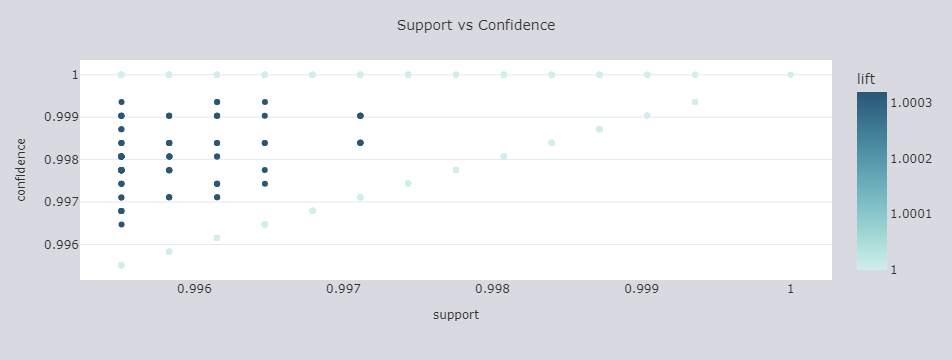

In [177]:
fig=px.scatter(full_rules_df, x='support', y='confidence', color='lift', color_continuous_scale="teal")
apply_custom_style(fig, 'Support vs Confidence')
fig.update_traces(line=dict(color='#6474A4'))
fig.show()

In [178]:
def visualize_rules(item, no_of_rules, basket_fpgrowth):
    # df of item passed
    item_df = basket_fpgrowth.loc[basket_fpgrowth[item] == 1]

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    print(rules['consequents'].head(6).tolist())

    support = rules.support.values
    confidence = rules.confidence.values

    for i in range(len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5)
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)

    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("plasma", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.seismic)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

In order to compare both algorithms I selected the same item frozen chicken to plot the rules:

Items frequently bought together with frozen chicken
[frozenset({'specialty vegetables'}), frozenset({'frozen chicken'}), frozenset({'frozen chicken'}), frozenset({'specialty vegetables', 'kitchen utensil'}), frozenset({'specialty vegetables', 'preservation products'}), frozenset({'frozen chicken'})]
Visualization of Rules


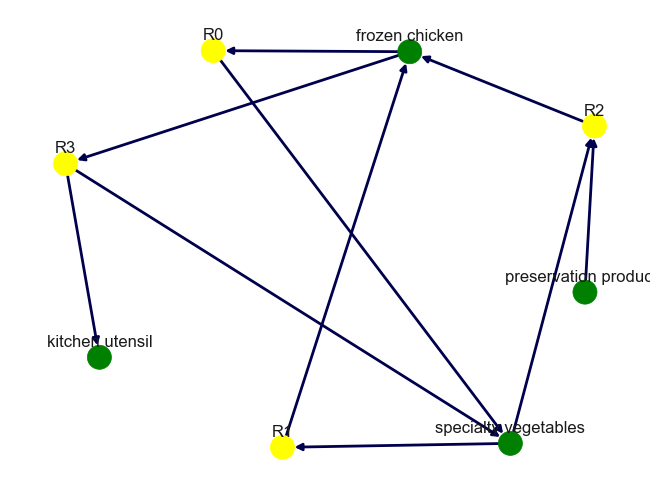

In [179]:
visualize_rules('frozen chicken',4,basket_fpgrowth)

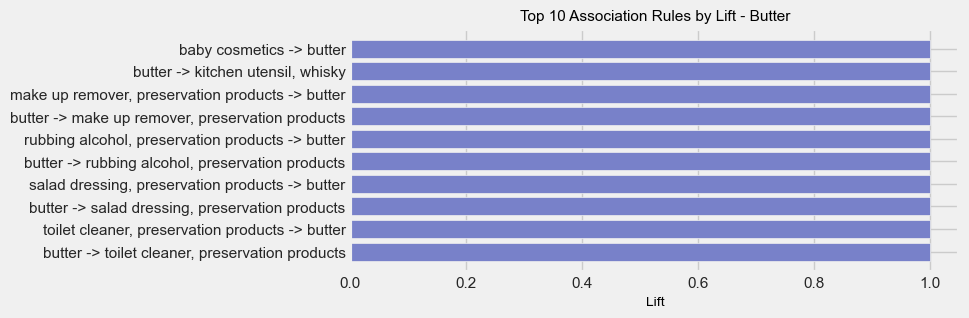

In [180]:
butter_df1 = basket_fpgrowth.loc[basket_fpgrowth['butter']==1]
frequent_itemsets_butter = apriori(butter_df1, min_support=0.999, use_colnames=True)
rules_butter = association_rules(frequent_itemsets_butter, metric="lift", min_threshold=1)
top_rules_butter = rules_butter.sort_values(by='lift', ascending=False).head(10)

# Convert frozensets to strings for labeling
top_rules_butter['antecedents_str'] = top_rules_butter['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules_butter['consequents_str'] = top_rules_butter['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart
plt.figure(figsize=(7, 3))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'],color='#7881C9')

plt.title('Top 10 Association Rules by Lift - Butter', fontsize=11, color='black')
plt.xlabel('Lift', fontsize=10, color='black')
plt.gca().invert_yaxis()
plt.show()

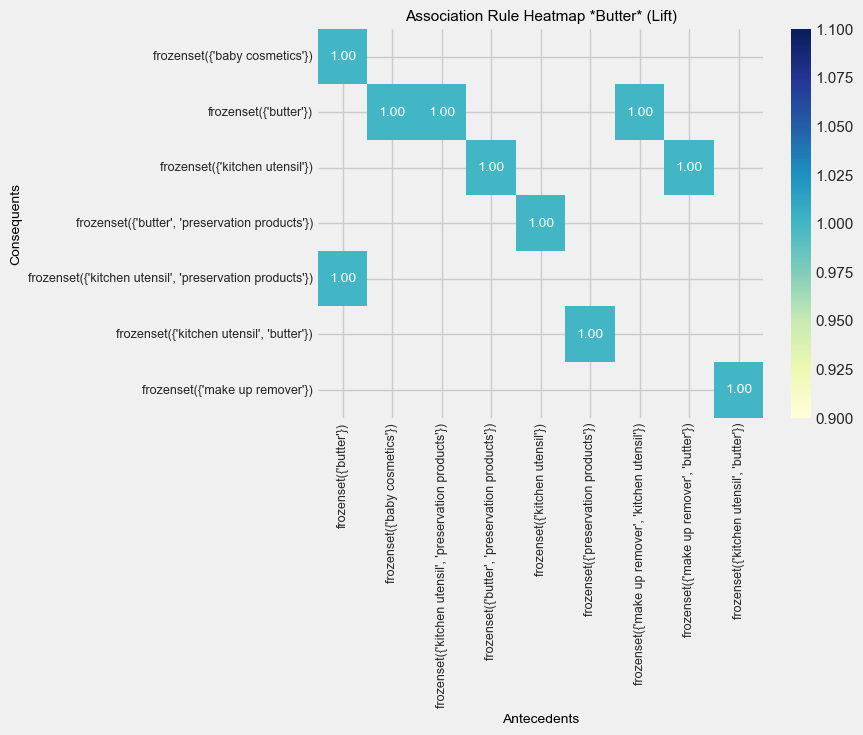

In [181]:
import seaborn as sns
heatmap_data = top_rules_butter.pivot(index='antecedents', columns='consequents', values='lift')

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 10})

plt.title('Association Rule Heatmap *Butter* (Lift)', fontsize=11, color='black')
plt.xlabel('Antecedents', fontsize=10, color='black')
plt.ylabel('Consequents', fontsize=10, color='black')
plt.tick_params(axis='both', which='major', labelsize=9)
plt.show()

Even trying different approaches the outcome seems not reasonable 

In [210]:
def frequently_bought_together(item, min_support=0.99):
    if item not in baskets.columns:
        print(f'Item "{item}" not found in the dataset.')
        return []

    item_df = baskets[baskets[item]]
    
    # Applying fpgrowth algorithm on item df
    frequent_itemsets = fpgrowth(item_df, min_support=min_support, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    sorted_rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    
    print(f'Items frequently bought together with {item}')
    
    # Filtering rules where the item is in the antecedents
    filtered_rules = sorted_rules[sorted_rules['antecedents'].apply(lambda x: item in x)]
    
    # Returning top 5 items with highest lift and support
    top_items = filtered_rules['consequents'].head(5).unique()
    
    return top_items

Items frequently bought together with frozen chicken
[frozenset({'hair spray'}) frozenset({'honey', 'decalcifier'})
 frozenset({'honey', 'decalcifier', 'preservation products'})]


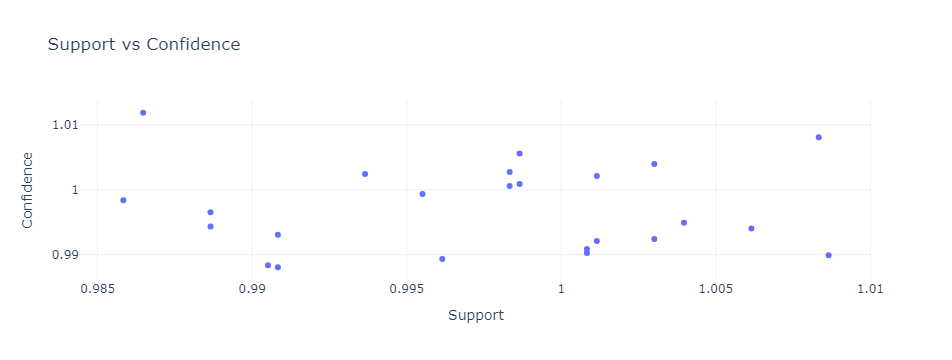

In [211]:
# Getting frequent items
item = 'frozen chicken'
frequently_bought_together_items = frequently_bought_together(item)
print(frequently_bought_together_items)

# Plotting support vs confidence for the rules
fig = px.scatter(rules, x='support', y='confidence', 
                 title='Support vs Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

fig.show()

## Compare Apriori vs Fp_growth

In [91]:
import time

In [152]:
df.head()

,Member_number,Date,itemDescription,Day,Month,Year,Weekend,Day_name,Quantity,Invoice
0,1808,2015-07-21,tropical fruit,21,7,2015,0,Tuesday,1,1808-2015-07-21
1,2552,2015-01-05,whole milk,5,1,2015,0,Monday,1,2552-2015-01-05
2,2300,2015-09-19,pip fruit,19,9,2015,1,Saturday,1,2300-2015-09-19
3,1187,2015-12-12,other vegetables,12,12,2015,1,Saturday,1,1187-2015-12-12
4,3037,2015-02-01,whole milk,1,2,2015,1,Sunday,1,3037-2015-02-01


In [87]:
basket_calculation = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
# Using True & False instead of 1 & 0 because it has better performance 
def one_hot_encoder(count):
    return count <= 0

basket_calculation = basket_calculation.iloc[:, 1:basket_calculation.shape[1]].applymap(one_hot_encoder)
basket_calculation.head(1)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True


In [88]:
basket_calculation.shape

(3898, 167)

For some reason the code below is not running anymore, I tried several approaches to solve this issue but none have been successful.

In [95]:
import time
n_range = range(1, 10, 1)
list_time_ap = []
list_time_fp = []
for n in n_range:
    time_ap = 0
    time_fp = 0
    min_sup = float(n/100)
    time_ap = perform_rule_calculation(basket_calculation, rule_type="fpgrowth", min_support=min_sup)
    time_fp = perform_rule_calculation(basket_calculation, rule_type="aprior", min_support=min_sup)
    list_time_ap.append(time_ap)
    list_time_fp.append(time_fp)


KeyboardInterrupt



In [ ]:
list_time_ap

In [ ]:
plt.plot(n_range, list_time_ap, label='Apriori', color='green')
plt.plot(n_range, list_time_fp, label='Fp_growth', color='red')
plt.xlabel("Support (%)")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="best")
plt.show()

Despite both algorithms achieving high average accuracy, a perfect score can sometimes indicate overfitting, where the model has learned the training data too well, including the noise and exceptions. This can reduce its ability to generalise to new, unseen data.

## Content and Collaborative filtering
Discuss and explain the purpose of a recommendation system for online retail business in machine
learning. Briefly compare Content and Collaborative filtering using any dataset of your choice (Datasets used
in the class tutorials or exercises are not allowed to use in this CA2). Train and test machine learning models
for the user-user and item-item collaborative filtering. Justify your recommendations for the considered
scenario by providing a conceptual insight.

Collborative filtering comes in two variations:.
1-
User-Based Similari
.t2-y
Item-Based Similarity

In [104]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from fuzzywuzzy import fuzz
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

### Create User Based Collaborative Filtering

This project aims to build a Grocery Recommendation System that will provide suggestions to the customers about the relevant products they might want to buy next. There are two general types of collaborative filtering:
User to user and Item to item. In the Grocery content, only User to user will be employed. 

I generated user carts by listing the products each user has purchased. This data is represented as a sparse matrix (csr_matrix), where each row represents a user and each column represents an item. The matrix entries indicate whether an item was purchased by a user (1 if purchased, 0 if not). Using the NearestNeighbors algorithm, I then find similar users based on this matrix.

In [100]:
pivot_df1 = df.pivot_table(index='Member_number', columns='itemDescription', aggfunc='size', fill_value=0)

pivot_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [101]:
pivot_df1.shape

(3898, 167)

In [106]:
df_pivot_groceries_sparse = csr_matrix(pivot_df1.values)

In [107]:
df_pivot_groceries_sparse

<3898x167 sparse matrix of type '<class 'numpy.int64'>'
	with 34766 stored elements in Compressed Sparse Row format>

In [108]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(df_pivot_groceries_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

We can either select a random user or pre-define it. Randomly:

In [109]:
query_index=np.random.choice(pivot_df1.shape[0])
print(query_index)

1566


Pick an index:

In [172]:
query_index = 1

The index 1 refers to the member number 1001 as it is shown below

In [173]:
pivot_df1.iloc[query_index,:]

itemDescription
Instant food products    0
UHT-milk                 0
abrasive cleaner         0
artif. sweetener         0
baby cosmetics           0
                        ..
white bread              1
white wine               0
whole milk               2
yogurt                   0
zwieback                 0
Name: 1001, Length: 167, dtype: int64

Checking the member number:

In [175]:
member_chosen = pivot_df1.iloc[query_index, :]
member_chosen = member_chosen[member_chosen > 0]
member_chosen

itemDescription
beef                  1
curd                  1
frankfurter           2
rolls/buns            1
sausage               1
soda                  2
whipped/sour cream    1
white bread           1
whole milk            2
Name: 1001, dtype: int64

In [125]:
distances, indices = model_knn.kneighbors(pivot_df1.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

Based on the neighbourhood the 5 most similar customers are displayed below with their corresponding distance.

In [126]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_df1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_df1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 1001:

1: 4796, with distance of 0.2222222222222221:
2: 2842, with distance of 0.2928932188134524:
3: 4274, with distance of 0.3070651328164167:
4: 3620, with distance of 0.3119375379438132:
5: 1664, with distance of 0.3195861825602282:


In [130]:
recommended1 = pivot_df1.loc[4796, :]
recommended1 = recommended1[recommended1 > 0]
recommended1

itemDescription
Instant food products    1
beef                     1
chicken                  1
curd                     1
curd cheese              1
flour                    1
frankfurter              1
other vegetables         1
rolls/buns               1
soda                     2
white bread              1
whole milk               2
Name: 4796, dtype: int64

### Content Based (Groceries) 
Imagine a digital world that understands your preferences better than you do. This is the essence of content-based filtering, a sophisticated aspect of artificial intelligence (AI) and machine learning (ML).
It basically takes into account the user’s activities and then makes personalised suggestions. ght.

In [114]:
groceries_sample = df.groupby(["itemDescription"])["Quantity"].sum().reset_index()
groceries_sample.head()

,itemDescription,Quantity
0,Instant food products,60
1,UHT-milk,323
2,abrasive cleaner,22
3,artif. sweetener,29
4,baby cosmetics,3


In the context of grocery stores, content-based filtering is particularly useful for online shopping. The use of online grocery services has substantially increased over the years.
To employ this approach, I used the Term frequency Inverse document frequency (TFIDF) in the “item_description” which is a statistical formula to convert text documents into vectors based on the relevancy of the word, containing the information about less relevant and most relevant words in the document coupled with Cosine similarity. It measures the similarity between two non-zero vectors(TFIDF transformed earlier) in an inner product space by the cosine of the angle between them, yielding a value from -1 to 1: -1 indicates opposite vectors, 0 indicates orthogonal vectors, and 1 indicates similar vectors.


In [115]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz

# Vectorizer TF-IDF
tfidf_vector = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vector.fit_transform(groceries_sample['itemDescription'])

# Cosine simalirity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to find the closest item based on text similarity
def find_closest_item(itemDescription):
    leven_scores = list(enumerate(groceries_sample['itemDescription'].apply(lambda x: fuzz.ratio(x, itemDescription))))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_item_index = sorted_leven_scores[0][0]
    return closest_item_index

# Recommendation function based on content
def content_based_recommender(itemDescription, how_many=5):
    closest_item_index = find_closest_item(itemDescription)
    similar_items = list(enumerate(cosine_sim[closest_item_index]))
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)[1:how_many+1]
    recommendations = [(groceries_sample.iloc[i]['itemDescription'], cosine_score) for i, cosine_score in similar_items]
    return recommendations

In [116]:
tfidf_matrix

<167x188 sparse matrix of type '<class 'numpy.float64'>'
	with 281 stored elements in Compressed Sparse Row format>

Using the trained model, I chose "tropical fruit" to showcase the recommended items along with their cosine scores:

In [117]:
# Exemple
item_user_likes = 'tropical fruit'
recommendations = content_based_recommender(item_user_likes)
print("Recommendation for '{}':".format(item_user_likes))
for recommendation in recommendations:
    print(recommendation)

Recommendation for 'tropical fruit':
('canned fruit', 0.4141635747893715)
('citrus fruit', 0.3718033900611091)
('pip fruit', 0.3718033900611091)
('packaged fruit/vegetables', 0.32018514454009017)
('fruit/vegetable juice', 0.2913801229499841)


It suggested items similar to fruit, with canned fruit being the most similar, achieving a cosine score of 0.41.
By combining User-Based Collaborative Filtering and Content-Based Filtering, the Grocery Recommendation System can effectively enhance customer experience by providing personalized and relevant product recommendations.


# Movies Recommendation
To delve further into the recommendation system, I utilized an additional dataset obtained from MovieLens.
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018


To acknowledge use of the dataset in publications, please cite the following paper:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html

In [182]:
import os
import time

import math
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from fuzzywuzzy import fuzz

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [183]:
movies_filename='movies.csv'
ratings_filename='ratings.csv'

In [184]:
movies = pd.read_csv(movies_filename,usecols=['movieId', 'title', 'genres'],
                     dtype={'movieId': 'int32', 'title': 'str', 'genres': 'str'})
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [185]:
ratings = pd.read_csv(ratings_filename,usecols=['userId', 'movieId', 'rating'],
                      dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [186]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [187]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [188]:
movies.tail(5)

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [189]:
num_users = len(ratings.userId.unique())
num_items = len(ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this dataset'.format(num_users,num_items))

There are 610 unique users and 9724 unique movies in this dataset


In [190]:
num_movies = len(movies.movieId.unique())
print('There are {} unique movies in this dataset'.format(num_movies))

There are 9742 unique movies in this dataset


In [191]:
def create_missing_df(dataframe):
    missing_index=dataframe.columns.tolist()
    missing=dataframe.isnull().sum().tolist()
    missing_df=pd.DataFrame({'Missing':missing}, index=missing_index)
    return missing_df

In [192]:
create_missing_df(ratings)

,Missing
userId,0
movieId,0
rating,0


In [193]:
create_missing_df(movies)

,Missing
movieId,0
title,0
genres,0


In [194]:
#extract title function
def extract_title(title):
    year = title[len(title)-5:len(title)-1]
    
    if year.isnumeric():
        title_no_year=title[:len(title)-7]
        return title_no_year
    else:
        return title

In [195]:
#extract year function
def extract_year(title):
    year = title[len(title)-5:len(title)-1]
    
    if year.isnumeric():
        return int(year)
    else:
        return np.nan

The year was included in the title column, so a separate column for the year was created along with another column for the title only.

In [196]:
movies.rename(columns={'title':'title_year'}, inplace=True)
movies['title_year']=movies['title_year'].apply(lambda x:x.strip())
movies['title']=movies['title_year'].apply(extract_title)
movies['year']=movies['title_year'].apply(extract_year)

In [197]:
movies = movies[~(movies['genres']=='(no genres listed)')].reset_index(drop=True)

In [198]:
movies['genres'] = movies['genres'].str.replace('|',' ')

In [199]:
movies['genres'].unique()

array(['Adventure Animation Children Comedy Fantasy',
       'Adventure Children Fantasy', 'Comedy Romance',
       'Comedy Drama Romance', 'Comedy', 'Action Crime Thriller',
       'Adventure Children', 'Action', 'Action Adventure Thriller',
       'Comedy Horror', 'Adventure Animation Children', 'Drama',
       'Action Adventure Romance', 'Crime Drama', 'Drama Romance',
       'Action Comedy Crime Drama Thriller', 'Comedy Crime Thriller',
       'Crime Drama Horror Mystery Thriller', 'Drama Sci-Fi',
       'Children Drama', 'Adventure Drama Fantasy Mystery Sci-Fi',
       'Mystery Sci-Fi Thriller', 'Children Comedy', 'Drama War',
       'Action Crime Drama', 'Action Adventure Fantasy',
       'Comedy Drama Thriller', 'Mystery Thriller',
       'Animation Children Drama Musical Romance',
       'Crime Mystery Thriller', 'Adventure Drama', 'Drama Thriller',
       'Comedy Crime', 'Action Sci-Fi Thriller',
       'Action Comedy Horror Thriller', 'Comedy Drama', 'Documentary',
       'Ac

In [200]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9708 entries, 0 to 9707
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieId     9708 non-null   int32  
 1   title_year  9708 non-null   object 
 2   genres      9708 non-null   object 
 3   title       9708 non-null   object 
 4   year        9704 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 341.4+ KB


In [201]:
counts=dict()

for i in movies.index:
    for g in movies.loc[i,'genres'].split(' '):
        if g not in counts:
            counts[g]=1
        else:
            counts[g]=counts[g]+1

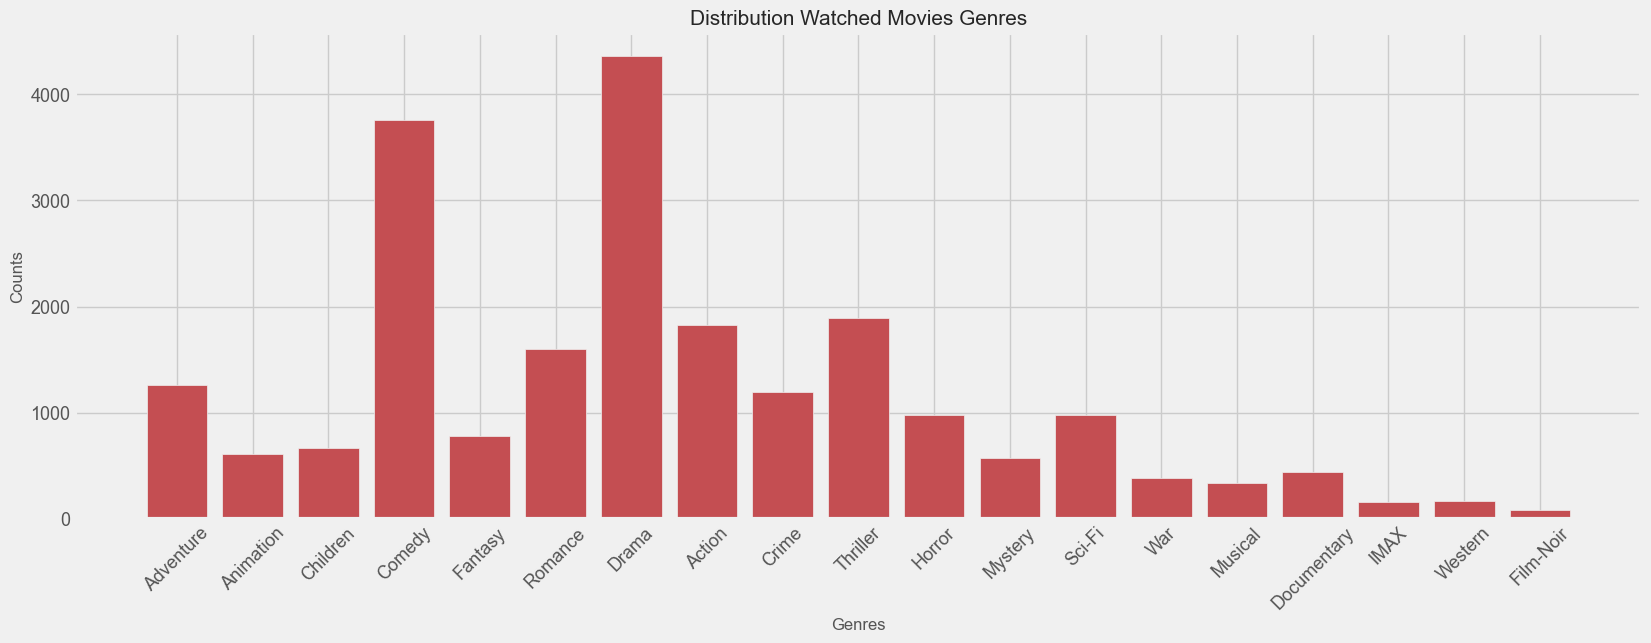

In [208]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,6))
plt.bar(list(counts.keys()),counts.values(),color='r')
plt.title('Distribution Watched Movies Genres', fontsize=15)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Despite the different context, I decided to maintain a similar visual style for the visualizations in the Movies Recommender, only using different colors for the bars.

## CONTENT BASED RECOMMENDER

## Item-Item

In the context of movies, this approach relies on movies watched by a user.
Initially, I constructed the dataset to be used. It incorporates a new attribute named "meta," encompassing the genre, year, and tag. I retain the "movieId" and the “title” as well


In [76]:
movie_tags = tags.groupby('movieId')['tag'].apply(list).reset_index(name='tag')
movie_tags['tag'] = movie_tags['tag'].apply(lambda x: ' '.join(x))
movie_genres_tags = movies.merge(movie_tags,how='inner',on='movieId')
movie_metadata = movie_genres_tags
movie_metadata['year'] = movie_metadata['year'].astype(str)
movie_metadata['meta'] = movie_metadata['genres']+movie_metadata['tag']+movie_metadata['year'] 
movie_metadata= movie_metadata[['movieId', 'title', 'meta']]
# movie_metadata['meta'] = movie_metadata['meta']
movie_metadata

,movieId,title,meta
0,1,Toy Story,Adventure Animation Children Comedy Fantasypix...
1,2,Jumanji,Adventure Children Fantasyfantasy magic board ...
2,3,Grumpier Old Men,Comedy Romancemoldy old1995.0
3,5,Father of the Bride Part II,Comedypregnancy remake1995.0
4,7,Sabrina,Comedy Romanceremake1995.0
...,...,...,...
1566,183611,Game Night,Action Comedy Crime HorrorComedy funny Rachel ...
1567,184471,Tomb Raider,Action Adventure Fantasyadventure Alicia Vikan...
1568,187593,Deadpool 2,Action Comedy Sci-FiJosh Brolin Ryan Reynolds ...
1569,187595,Solo: A Star Wars Story,Action Adventure Children Sci-FiEmilia Clarke ...


In [77]:
movie_metadata.shape

(1571, 3)

To transform the words into vectors I used CountVectorizer. It works similarly to TFIDF but is less time-consuming due to its process. It converts text into fixed-length vectors by counting how many times each word appears. The tokens are then stored as a bag-of-words. After that, the cosine similarity is calculated. 

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

#Construct the required CountVectorizer matrix by fitting and transforming the data
count_matrix  = count_vectorizer.fit_transform(movie_metadata['meta'])

#Output the shape of count_matrix
count_matrix.shape

(1571, 3222)

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim.shape

(1571, 1571)

In [80]:
#Construct a reverse map of indices and movie ids
indices = pd.Series(movie_metadata.index, index=movie_metadata['title'])
indices

title
Toy Story                         0
Jumanji                           1
Grumpier Old Men                  2
Father of the Bride Part II       3
Sabrina                           4
                               ... 
Game Night                     1566
Tomb Raider                    1567
Deadpool 2                     1568
Solo: A Star Wars Story        1569
Gintama: The Movie             1570
Length: 1571, dtype: int64

Get Top 10 recommendations according to similarity

In [88]:
# Function that takes in movie title as input and outputs most similar movies with cosine scores
def get_recommendations(title, movie_metadf, movies_df, cosine_sim):
    print('You want recommendations for:', title)
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices and their titles
    movie_indices = [i[0] for i in sim_scores]
    similar_movies = movie_metadf['title'].iloc[movie_indices].reset_index(drop=True)
    similarity_scores = [i[1] for i in sim_scores]
    
    # Print the top 10 most similar movies with their cosine similarity scores
    for movie, score in zip(similar_movies, similarity_scores):
        print(f"{movie}: {score}")
    
    # Return the top 10 most similar movies and their cosine similarity scores
    return similar_movies, similarity_scores

In [89]:
get_recommendations('Toy Story',movie_metadata,movies, cosine_sim)

You want recommendations for: Toy Story
Aladdin: 0.6761234037828132
Grand Day Out with Wallace and Gromit, A: 0.6172133998483676
Shrek 2: 0.6172133998483676
Shrek: 0.5714285714285713
Muppet Treasure Island: 0.5669467095138407
Pete's Dragon: 0.5669467095138407
Wallace & Gromit: The Wrong Trousers: 0.5669467095138407
Jungle Book, The: 0.5669467095138407
Lady and the Tramp: 0.5669467095138407
Secret of NIMH, The: 0.5669467095138407


(0                                     Aladdin
 1    Grand Day Out with Wallace and Gromit, A
 2                                     Shrek 2
 3                                       Shrek
 4                      Muppet Treasure Island
 5                               Pete's Dragon
 6        Wallace & Gromit: The Wrong Trousers
 7                            Jungle Book, The
 8                          Lady and the Tramp
 9                         Secret of NIMH, The
 Name: title, dtype: object,
 [0.6761234037828132,
  0.6172133998483676,
  0.6172133998483676,
  0.5714285714285713,
  0.5669467095138407,
  0.5669467095138407,
  0.5669467095138407,
  0.5669467095138407,
  0.5669467095138407,
  0.5669467095138407])

## Item-Item / Second Approach

In [30]:
#!pip install gensim

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [32]:
movies.head()

,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure Children Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0


In [33]:
movies.shape

(9708, 5)

In [34]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [35]:
movies_tags = pd.merge(movies, tags, on="movieId")

In [36]:
df_movies = movies_tags
df_movies.head()

,movieId,title_year,genres,title,year,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0,567,fun,1525286013
3,2,Jumanji (1995),Adventure Children Fantasy,Jumanji,1995.0,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure Children Fantasy,Jumanji,1995.0,62,magic board game,1528843932


In [37]:
# Combine movie name and tags into a single string
df_movies['content'] = df_movies['title_year'].astype(str) + ' ' + df_movies['tag'].astype(str) + ' ' + df_movies['genres']

df_movies['content'] = df_movies['content'].fillna('')

# Tokenize content for Word2Vec
df_movies['tokenized_content'] = df_movies['content'].apply(simple_preprocess)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_movies, test_size=0.2, random_state=42)

# Initialize the Word2Vec model (without training)
model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

In [38]:
# Build the vocabulary using the training set
model.build_vocab(train_df['tokenized_content'])

# Train the model
model.train(train_df['tokenized_content'], total_examples=model.corpus_count, epochs=10)

(138691, 218040)

In [39]:
# Function to average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords += 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Function to compute average word vectors for all movies
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    return np.array(features)

# Compute average word vectors for both the training and testing sets
train_w2v_feature_array = averaged_word_vectorizer(corpus=train_df['tokenized_content'], model=model, num_features=100)
test_w2v_feature_array = averaged_word_vectorizer(corpus=test_df['tokenized_content'], model=model, num_features=100)

# Get the user input
user_movie = input("Enter a movie title: ")

Enter a movie title:  Toy Story


In [40]:
# Find the index of the user movie in the test set
if user_movie in test_df['title'].values:
    movie_index = test_df[test_df['title'] == user_movie].index[0]

    # Compute the cosine similarities between the user movie and all other movies in the test set
    user_movie_vector = test_w2v_feature_array[test_df.index.get_loc(movie_index)].reshape(1, -1)
    similarity_scores = cosine_similarity(user_movie_vector, test_w2v_feature_array)

    # Get the top 10 most similar movies
    similar_movies = list(enumerate(similarity_scores[0]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:20]

    # Print the top 10 similar movies with movieId
    for i, score in sorted_similar_movies:
        movie_id = test_df.iloc[i]['movieId']
        movie_title = test_df.iloc[i]['title']
        print("MovieId: {}, Title: {}, Similarity Score: {:.2f}".format(movie_id, movie_title, score))
else:
    print("Movie not found in test set.")

MovieId: 8360, Title: Shrek 2, Similarity Score: 1.00
MovieId: 1367, Title: 101 Dalmatians, Similarity Score: 1.00
MovieId: 68954, Title: Up, Similarity Score: 1.00
MovieId: 68954, Title: Up, Similarity Score: 1.00
MovieId: 68954, Title: Up, Similarity Score: 1.00
MovieId: 68954, Title: Up, Similarity Score: 1.00
MovieId: 3052, Title: Dogma, Similarity Score: 1.00
MovieId: 3052, Title: Dogma, Similarity Score: 1.00
MovieId: 50872, Title: Ratatouille, Similarity Score: 1.00
MovieId: 596, Title: Pinocchio, Similarity Score: 1.00
MovieId: 421, Title: Black Beauty, Similarity Score: 1.00
MovieId: 74791, Title: Town Called Panic, A (Panique au village), Similarity Score: 1.00
MovieId: 31658, Title: Howl's Moving Castle (Hauru no ugoku shiro), Similarity Score: 1.00
MovieId: 8961, Title: Incredibles, The, Similarity Score: 1.00
MovieId: 66097, Title: Coraline, Similarity Score: 1.00
MovieId: 3000, Title: Princess Mononoke (Mononoke-hime), Similarity Score: 1.00
MovieId: 101142, Title: Croods

In [41]:
# Find the index of the user movie in the test set
if user_movie in test_df['title'].values:
    movie_index = test_df[test_df['title'] == user_movie].index[0]

    # Compute the cosine similarities between the user movie and all other movies in the test set
    user_movie_vector = test_w2v_feature_array[test_df.index.get_loc(movie_index)].reshape(1, -1)
    similarity_scores = cosine_similarity(user_movie_vector, test_w2v_feature_array)

    # Get the top 10 most similar movies
    similar_movies = list(enumerate(similarity_scores[0]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:20]

    # Print the top 10 similar movies
    for i, score in sorted_similar_movies:
        print("{}: {}".format(test_df.iloc[i]['title'], score))
else:
    print("Movie not found in test set.")

Shrek 2: 0.9998765812354427
101 Dalmatians: 0.9998702153484579
Up: 0.9998547230080956
Up: 0.9998536731738646
Up: 0.9998349120271883
Up: 0.9998346721274534
Dogma: 0.9998286567851715
Dogma: 0.9998266899467362
Ratatouille: 0.9997772168403797
Pinocchio: 0.9997534337627141
Black Beauty: 0.9996681944970099
Town Called Panic, A (Panique au village): 0.9996429771288979
Howl's Moving Castle (Hauru no ugoku shiro): 0.9996072315628004
Incredibles, The: 0.9995905211729845
Coraline: 0.999588808163792
Princess Mononoke (Mononoke-hime): 0.9995322957226511
Croods, The: 0.9995289399184499
Big Hero 6: 0.9995244732764641
Princess Mononoke (Mononoke-hime): 0.9995217950324716


Content-based recommenders, while useful, have their limitations. They struggle to capture intricate interdependencies or nuanced preferences, highlighting the importance of exploring various approaches and comprehending the recommendation process. For instance, I might prefer adventure movies that incorporate historical elements, rather than those that focus solely on action. Such nuances often evade the capabilities of these recommenders.

## COLLABORATIVE FILTERING
In a more general sense, collaborative filtering is the process of filtering for information among users. These models analyse user preferences and recommend content based on similar users' behaviour. For example, if User A enjoys the same shows as User B, the algorithm suggests shows that User B liked but User A hasn't seen yet.

In [90]:
from surprise import Reader, Dataset, SVD, model_selection
reader = Reader()
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable.
The ‘Reader’ class from the surprise library in Python is used to parse the rating dataframe. It allows customization of parsing rating scale and data format, ensuring compatibility with Surprise's recommendation algorithms and evaluation functions.

In [91]:
# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD()

In [92]:
model_selection.cross_validate(algo,data,measures=['RMSE','MAE'])

{'test_rmse': array([0.87169057, 0.87669274, 0.87333092, 0.87116029, 0.87086791]),
 'test_mae': array([0.67093647, 0.67316533, 0.6731101 , 0.67039475, 0.66678818]),
 'fit_time': (1.3731513023376465,
  1.5220725536346436,
  1.3861701488494873,
  1.8167757987976074,
  1.9654576778411865),
 'test_time': (0.1756136417388916,
  0.13261675834655762,
  0.4421999454498291,
  0.5419588088989258,
  0.3831026554107666)}

In [93]:
# taken from surprise docs
import collections
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [94]:
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
# predictions
top_n = get_top_n(predictions, n=10)

In [95]:
print_count = 10
cur_p_count = 0
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    cur_p_count+=1
    if cur_p_count>=print_count:
      break

1 [318, 1704, 48516, 914, 908, 912, 1203, 1250, 3508, 364]
2 [1104, 1252, 1233, 56782, 3037, 720, 3030, 1272, 1228, 260]
3 [8981, 6104, 4848, 5225, 1252, 122926, 1249, 1248, 589, 32587]
4 [953, 356, 2542, 318, 922, 4776, 1278, 1267, 3499, 8665]
5 [912, 1197, 922, 1080, 750, 1233, 111, 1208, 1278, 1252]
6 [1204, 260, 3578, 142488, 1035, 1210, 1276, 1242, 6377, 1104]
7 [1136, 1089, 4011, 54001, 741, 57669, 5971, 1223, 1204, 527]
8 [750, 2324, 6874, 1204, 2959, 1136, 1237, 1704, 48516, 541]
9 [4226, 296, 1204, 527, 47, 260, 593, 858, 4973, 7153]
10 [3089, 922, 8368, 2019, 475, 1196, 913, 48516, 3451, 750]


In [109]:
# List of movieIds to find
movie_ids = [318, 48516, 58559, 914, 475, 904, 908, 910, 912, 1199]

# Filter the dataframe to only include the specified movieIds
filtered_df = movies[movies['movieId'].isin(movie_ids)]

# Print the movie titles corresponding to the specified movieIds along with gender
for movie_id in movie_ids:
    movie_info = filtered_df[filtered_df['movieId'] == movie_id]
    if not movie_info.empty:
        movie_title = movie_info['title_year'].values[0]
        movie_genre = movie_info['genres'].values[0]
        print(f"MovieId {movie_id}: {movie_title} (Genre: {movie_genre})")
    else:
        print(f"MovieId {movie_id}: Not found")

MovieId 318: Shawshank Redemption, The (1994) (Genre: Crime Drama)
MovieId 48516: Departed, The (2006) (Genre: Crime Drama Thriller)
MovieId 58559: Dark Knight, The (2008) (Genre: Action Crime Drama IMAX)
MovieId 914: My Fair Lady (1964) (Genre: Comedy Drama Musical Romance)
MovieId 475: In the Name of the Father (1993) (Genre: Drama)
MovieId 904: Rear Window (1954) (Genre: Mystery Thriller)
MovieId 908: North by Northwest (1959) (Genre: Action Adventure Mystery Romance Thriller)
MovieId 910: Some Like It Hot (1959) (Genre: Comedy Crime)
MovieId 912: Casablanca (1942) (Genre: Drama Romance)
MovieId 1199: Brazil (1985) (Genre: Fantasy Sci-Fi)


In [112]:
user_1_movies = ratings[ratings['userId'] == 1]['movieId'].unique()
print(user_1_movies)

[   1    3    6   47   50   70  101  110  151  157  163  216  223  231
  235  260  296  316  333  349  356  362  367  423  441  457  480  500
  527  543  552  553  590  592  593  596  608  648  661  673  733  736
  780  804  919  923  940  943  954 1009 1023 1024 1025 1029 1030 1031
 1032 1042 1049 1060 1073 1080 1089 1090 1092 1097 1127 1136 1196 1197
 1198 1206 1208 1210 1213 1214 1219 1220 1222 1224 1226 1240 1256 1258
 1265 1270 1275 1278 1282 1291 1298 1348 1377 1396 1408 1445 1473 1500
 1517 1552 1573 1580 1587 1617 1620 1625 1644 1676 1732 1777 1793 1804
 1805 1920 1927 1954 1967 2000 2005 2012 2018 2028 2033 2046 2048 2054
 2058 2078 2090 2093 2094 2096 2099 2105 2115 2116 2137 2139 2141 2143
 2161 2174 2193 2253 2268 2273 2291 2329 2338 2353 2366 2387 2389 2395
 2406 2414 2427 2450 2459 2470 2478 2492 2502 2528 2529 2542 2571 2580
 2596 2616 2617 2628 2640 2641 2644 2648 2654 2657 2692 2700 2716 2761
 2797 2826 2858 2872 2899 2916 2944 2947 2948 2949 2959 2985 2987 2991
 2993 

In [115]:
# List of movie IDs
movie_ids2 = [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231]

# Filter the dataframe to only include the specified movie IDs
filtered_df = movies[movies['movieId'].isin(movie_ids2)]

# Extract genres for each movie and combine them into a single set
unique_genres = set(filtered_df['genres'].str.split('|').explode())

# Print the unique genres
print("Genres for the watched movies by the user 1:")
for genre in unique_genres:
    print(genre)

Genres for the watched movies by the user 1:
Adventure Animation Children Comedy Fantasy
Action Romance Western
Comedy
Action Crime Thriller
Action Drama Romance War
Adventure Comedy Crime Romance
Adventure Comedy
Comedy Romance
Action Comedy Horror Thriller
Mystery Thriller
Comedy War
Crime Mystery Thriller
Action Drama War


In [98]:
top_n

defaultdict(list,
            {1: [(318, 5),
              (1704, 5),
              (48516, 5),
              (914, 5),
              (908, 5),
              (912, 5),
              (1203, 5),
              (1250, 5),
              (3508, 5),
              (364, 5)],
             2: [(1104, 4.536586191862117),
              (1252, 4.5176627137626255),
              (1233, 4.473979232994515),
              (56782, 4.424131978097607),
              (3037, 4.404357263361774),
              (720, 4.392415353876125),
              (3030, 4.3918332425894215),
              (1272, 4.3903831251930985),
              (1228, 4.38643780814484),
              (260, 4.381066702107624)],
             3: [(8981, 3.7094762276236883),
              (6104, 3.6543840960029317),
              (4848, 3.645078622338158),
              (5225, 3.61155770643622),
              (1252, 3.608382874925538),
              (122926, 3.569197568032045),
              (1249, 3.5252416573886354),
              (1248, 3.